In [78]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv(os.path.join("Resources", "Spotify_Audio_Features.csv"))
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0,Ariana Grande,"thank u, next",2rPE9A1vEgShuZxxzR2tZH,100,0.28000,0.724,207333,0.647,0.000000,"C♯, D♭",0.1020,-5.642,Minor,0.0658,106.960,4,0.435
1,1,Los Unidades,E-Lo (feat. Jozzy),3eydp9rHJAskzOevEBK267,69,0.46900,0.698,214720,0.797,0.001180,"D♯, E♭",0.1520,-5.125,Major,0.0615,101.969,4,0.530
2,2,Travis Scott,SICKO MODE,2xLMifQCjDGFmkHkpNLD9h,94,0.00513,0.834,312820,0.730,0.000000,"G♯, A♭",0.1240,-3.714,Minor,0.2220,155.008,4,0.446
3,3,Sheck Wes,Mo Bamba,1xzBco0xcoJEDXktl7Jxrr,93,0.19400,0.729,183907,0.625,0.009860,E,0.2480,-5.266,Minor,0.0315,146.034,4,0.261
4,4,Kodak Black,ZEZE (feat. Travis Scott & Offset),7l3E7lcozEodtVsSTCkcaA,94,0.05150,0.861,228654,0.637,0.000003,"G♯, A♭",0.0967,-5.692,Major,0.2400,98.044,4,0.474


In [80]:
bins = [-1, 99, 249, 10000]

labels = ["hot", "popular", "random"]

In [81]:
df["Hit Songs"] = pd.cut(df["Unnamed: 0"], bins, labels=labels)
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Hit Songs
0,0,Ariana Grande,"thank u, next",2rPE9A1vEgShuZxxzR2tZH,100,0.28000,0.724,207333,0.647,0.000000,"C♯, D♭",0.1020,-5.642,Minor,0.0658,106.960,4,0.435,hot
1,1,Los Unidades,E-Lo (feat. Jozzy),3eydp9rHJAskzOevEBK267,69,0.46900,0.698,214720,0.797,0.001180,"D♯, E♭",0.1520,-5.125,Major,0.0615,101.969,4,0.530,hot
2,2,Travis Scott,SICKO MODE,2xLMifQCjDGFmkHkpNLD9h,94,0.00513,0.834,312820,0.730,0.000000,"G♯, A♭",0.1240,-3.714,Minor,0.2220,155.008,4,0.446,hot
3,3,Sheck Wes,Mo Bamba,1xzBco0xcoJEDXktl7Jxrr,93,0.19400,0.729,183907,0.625,0.009860,E,0.2480,-5.266,Minor,0.0315,146.034,4,0.261,hot
4,4,Kodak Black,ZEZE (feat. Travis Scott & Offset),7l3E7lcozEodtVsSTCkcaA,94,0.05150,0.861,228654,0.637,0.000003,"G♯, A♭",0.0967,-5.692,Major,0.2400,98.044,4,0.474,hot


In [82]:
drop_list = ['track_name', 'track_id', 'Unnamed: 0']
data = df.drop(drop_list, axis=1)
data.head()

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Hit Songs
0,Ariana Grande,100,0.28000,0.724,207333,0.647,0.000000,"C♯, D♭",0.1020,-5.642,Minor,0.0658,106.960,4,0.435,hot
1,Los Unidades,69,0.46900,0.698,214720,0.797,0.001180,"D♯, E♭",0.1520,-5.125,Major,0.0615,101.969,4,0.530,hot
2,Travis Scott,94,0.00513,0.834,312820,0.730,0.000000,"G♯, A♭",0.1240,-3.714,Minor,0.2220,155.008,4,0.446,hot
3,Sheck Wes,93,0.19400,0.729,183907,0.625,0.009860,E,0.2480,-5.266,Minor,0.0315,146.034,4,0.261,hot
4,Kodak Black,94,0.05150,0.861,228654,0.637,0.000003,"G♯, A♭",0.0967,-5.692,Major,0.2400,98.044,4,0.474,hot


In [83]:
#Encode track id, track name and artistname into quantitative
le = preprocessing.LabelEncoder()
data['Hit Songs'] = le.fit_transform(data['Hit Songs'].astype('str'))
data['key'] = le.fit_transform(data['key'].astype('str'))
data['artist_name'] = le.fit_transform(data['artist_name'].astype('str'))
data['mode'] = le.fit_transform(data['mode'].astype('str'))

In [84]:
target = data["Hit Songs"]
target_names = ["negative", "positive"]

In [85]:
train = data.drop("Hit Songs", axis=1)
feature_names = data.columns
train.head()

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,117,100,0.28000,0.724,207333,0.647,0.000000,4,0.1020,-5.642,1,0.0658,106.960,4,0.435
1,1047,69,0.46900,0.698,214720,0.797,0.001180,6,0.1520,-5.125,0,0.0615,101.969,4,0.530
2,1750,94,0.00513,0.834,312820,0.730,0.000000,11,0.1240,-3.714,1,0.2220,155.008,4,0.446
3,1530,93,0.19400,0.729,183907,0.625,0.009860,7,0.2480,-5.266,1,0.0315,146.034,4,0.261
4,948,94,0.05150,0.861,228654,0.637,0.000003,11,0.0967,-5.692,0,0.2400,98.044,4,0.474


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=42)

k: 1, Train/Test Score: 1.000/0.912
k: 3, Train/Test Score: 0.961/0.944
k: 5, Train/Test Score: 0.958/0.946
k: 7, Train/Test Score: 0.958/0.946
k: 9, Train/Test Score: 0.958/0.946
k: 11, Train/Test Score: 0.958/0.946
k: 13, Train/Test Score: 0.958/0.946
k: 15, Train/Test Score: 0.958/0.946
k: 17, Train/Test Score: 0.958/0.946
k: 19, Train/Test Score: 0.958/0.946


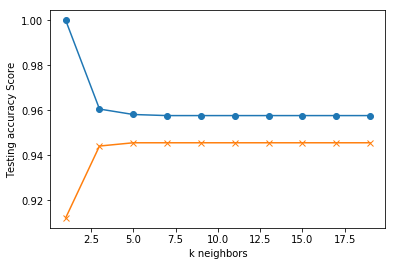

In [87]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [88]:
# Note that k: 9 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

k=9 Test Acc: 0.946
